## **Descriptive Analytics: Cep Survey, April 2015.**

Here we will take a look at the survey and explore it visually. 


> <i>Reference: https://www.cepchile.cl/cep/encuestas-cep/encuestas-2009-2018/estudio-nacional-de-opinion-publica-abril-2015</i>



In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as st
sns.set_style('whitegrid')

#Import Data from april 2015 CEP Survey
cep73 = pd.read_csv("https://raw.githubusercontent.com/rarmijok/Analytical-Politics/master/DATA/Encuesta%20CEP%2073%20Abril%202015.csv", index_col='FILTRO')
###PENDING: IMPORT FROM SPSS FILE

cleanup_nums = {"POSICION_POLITICA":{1:"Right",2:"Center",3:"Left",4:"Independent",5:np.nan}}
pos_order=["Left","Center","Right","Independent"]
cep73.replace(cleanup_nums, inplace=True)
#cep73["POSICION_POLITICA"]= cep73["POSICION_POLITICA"].astype('category')

#Rename T Score Columns
cep73=cep73.rename(columns={"MB_P19_A":"A Allamand","MB_P19_B":"I Allende","MB_P19_C":"O Andrade","MB_P19_D":"A Arenas","MB_P19_E":"M Bachelet","MB_P19_F":"M Enriquez-O","MB_P19_G":"C Escalona","MB_P19_H":"A Espina","MB_P19_I":"N Eyzaguirre","MB_P19_J":"G Girardi","MB_P19_K":"R LagosE","MB_P19_L":"R LagosW","MB_P19_M":"E Matthei","MB_P19_N":"C Mockenber","MB_P19_O":"C Montes","MB_P19_P":"MJ Ossandon","MB_P19_Q":"R Penailillo",  "MB_P19_R":"L Perez","MB_P19_S":"S Pinera","MB_P19_T":"J Pizarro","MB_P19_U":"J Quintana","MB_P19_V":"X Rincon","MB_P19_W":"G Tellier","MB_P19_X":"C Toha","MB_P19_Y":"C Vallejo","MB_P19_Z":"A Velasco","MB_P19_AA":"Von Baer","MB_P19_BB":"I Walker", "MB_P19_CC":"P Walker","MB_P19_DD":"Ma Nunez","MB_P19_EE":"F Kast"})
cep73[cep73.iloc[:,33:64]>5]=np.nan 
#Thermometer Scores matrix / SUBSET T SCORES
T = cep73.iloc[:,33:64]

## **Demographics and Political identification**

Useful graphics for univariate exploration of variables of demographics are histograms and bar plots, such as represented below.

* Histograms of age grouped by sex
* Bar Plot of political self identification. 



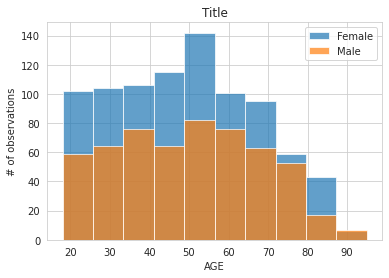

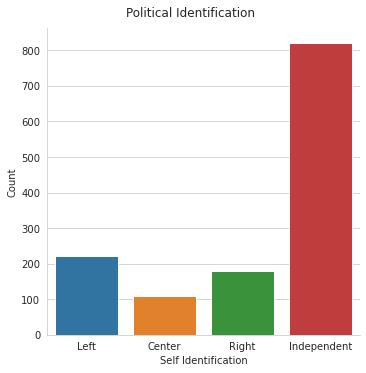

In [5]:
##count plot for regions
#sns.catplot(y="REGION",data=cep73,kind='count') 
#plt.show()
#histogram for age/sex
fig, ax = plt.subplots()
ax.hist(cep73[cep73["SEXO_ENTREV"]==2]["EDAD_ENTREV"],label="Female",alpha=0.7)
ax.hist(cep73[cep73["SEXO_ENTREV"]==1]["EDAD_ENTREV"],label="Male",alpha=0.7)
ax.set_title("Title")
ax.set_xlabel("AGE")
ax.set_ylabel("# of observations")
ax.legend()
plt.show()

#count plot for political position
g=sns.catplot(x="POSICION_POLITICA",data=cep73,kind='count',order=pos_order) 
g.fig.suptitle("Political Identification",y=1.03)
g.set(xlabel="Self Identification",ylabel="Count")
plt.show()



<h1>Thermometer scores</h1>

Respondents on the CEP survey are asked whether they have positive or negative feelings on a number of political figures. This question is structured on a 5-point scale with a neutral response. Below is a plot of the mean response by political figure, with the standard deviation.


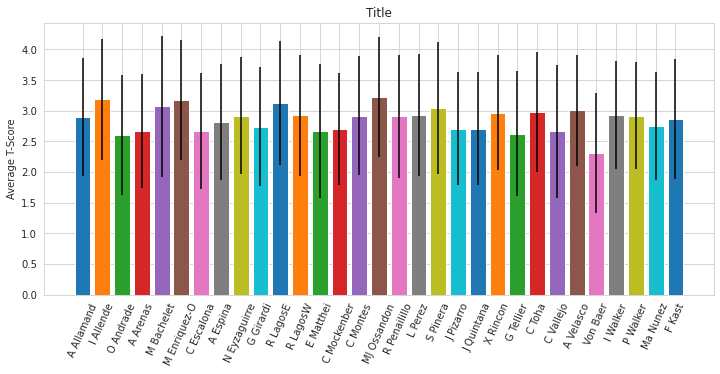

In [6]:
#Average rating 
Tcolumns = list(T)
fig, ax = plt.subplots()
for polititian in Tcolumns :
    ax.bar(polititian, T[polititian].mean(), yerr=T[polititian].std())
ax.set_xticklabels(Tcolumns, rotation=66)
ax.set_title("Title")
ax.set_ylabel("Average T-Score") 
fig.set_size_inches([12, 5])
plt.show()

<h1>T-Scores and political identification</h1>

Here we plot the mean thermometer feeling score of two politians, Andrés Allmand (right wing) and Camila Vallejos (Left wing), we can observe how political self identification is a source of bias in Thermometer scores. As respondents who identify as right wing give a higher score to Andrés Allmand than respondents who identify as left wing, while the inverse is true for Camila Vallejos.

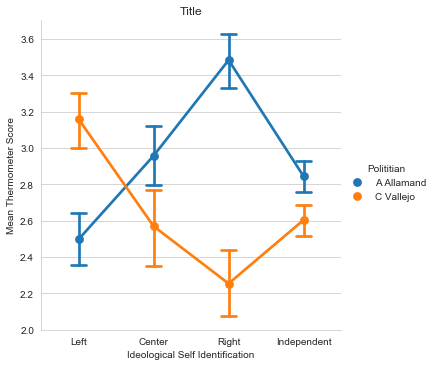

In [116]:
#Transform data into long so we can compare multimpe politicians in the same plot
T_compare=cep73[["A Allamand","C Vallejo","POSICION_POLITICA"]].reset_index()
T_compare = pd.melt(T_compare,
                    id_vars=["FILTRO","POSICION_POLITICA"],
                    var_name="Polititian",
                    value_name='T-score')
sns.catplot(data=T_compare,
            x="POSICION_POLITICA",
            y="T-score",
            kind="point",
            capsize=0.2,
            hue="Polititian",
            order=pos_order) 
ax = plt.gca()
ax.set_title("Title")
ax.set_xlabel("Ideological Self Identification") 
ax.set_ylabel("Mean Thermometer Score")
plt.show()


<h1>Political Knowledge</h1>

Let's explore Thermometer score nonresponse.

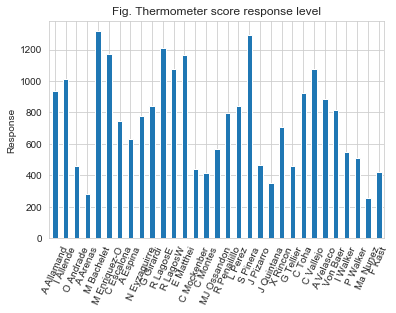

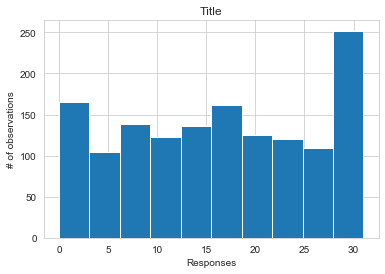

In [117]:
#Graph for political knowledge   
T.notna().sum().plot(kind="bar")
plt.xlabel("")
plt.ylabel("Response")
plt.title("Fig. Thermometer score response level")
plt.xticks(rotation=66)
#plt.set_size_inches([12, 5])
plt.show()

#sum row of T-Score responses / classify above media as informed
resp=pd.DataFrame(T.notna().sum(axis=1),columns=['T-response'])
resp['Informed'] =resp['T-response'] > resp['T-response'].median()
fig, ax = plt.subplots() 
ax.hist(resp["T-response"])
ax.set_xlabel("Responses") 
ax.set_ylabel("# of observations") 
ax.set_title("Title")
plt.show()



<h1>Relationship between T-Score and level of exposure</h1>

We can observe a positive correlation between thermometer scores and being known among respondets. While we cannot observe a causar relationship between the two, this lets us hypothesize on the incentives on political figures to want to constantly appear in the media. 

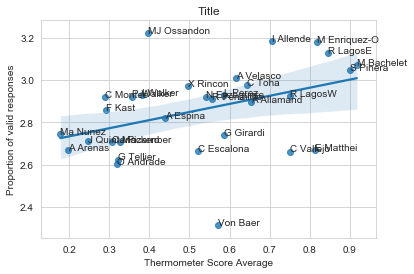

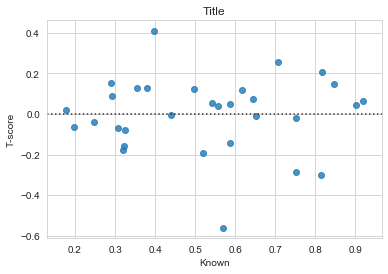

In [122]:
known = pd.DataFrame((T.isna().count()-T.isna().sum())/T.isna().count(),columns=['Known'])
Tscore = pd.DataFrame(T.mean(),columns=['T-score'])
TK = pd.concat([known,Tscore],axis=1)
fig=sns.regplot(x="Known", y="T-score",data=TK,order=1)
ax = plt.gca()
ax.set_title("Title")
ax.set_xlabel("Thermometer Score Average") 
ax.set_ylabel("Proportion of valid responses")
# add annotations
for line in range(0,TK.shape[0]):
     fig.text(TK["Known"][line], TK["T-score"][line], TK.index[line])#plt.show()
plt.show()


sns.residplot(x="Known", y="T-score",data=TK,order=1)
ax = plt.gca()
ax.set_title("Title")
plt.show()



<h1>Political knowledge and policy preferences</h1>



In [120]:
#Missing Values removed *Temporarily* #Missing value imputation
#T= T.dropna()
#T = T*20
#T = (100-T)/50
#print(T.head())
#from sklearn.manifold import smacof
#smacof(T,metric=False)

        A Allamand  I Allende  O Andrade  A Arenas  M Bachelet  M Enriquez-O  \
FILTRO                                                                         
1              4.0        4.0        NaN       NaN         2.0           4.0   
2              4.0        4.0        NaN       NaN         2.0           4.0   
3              3.0        3.0        NaN       NaN         3.0           3.0   
4              NaN        NaN        NaN       NaN         4.0           NaN   
5              3.0        4.0        2.0       2.0         4.0           2.0   

        C Escalona  A Espina  N Eyzaguirre  G Girardi  ...  X Rincon  \
FILTRO                                                 ...             
1              NaN       NaN           NaN        NaN  ...       NaN   
2              NaN       NaN           NaN        NaN  ...       NaN   
3              3.0       NaN           3.0        NaN  ...       NaN   
4              NaN       NaN           NaN        NaN  ...       NaN   
5      